# ' EXPLORATION & ANALYSIS OF CAR-MPG DATASET '


## Team members:

### 1.Taznain Fathima

### 2.John Clinton S

### 3.Akshay S Sutagatti

### 4.Mahaveer Sahu

### 5.Bapan Bairagya

This notebook aims primarily to demonstrate use of pandas, seaborn, matplotlib and plotly for exploration and visualization of the data-set 

In [25]:
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

We have imported all the packages and libraries we will be using for the initial exploration of data.

 - Exploration and Visualization using above packages

In [3]:
df=pd.read_csv('car-mpg.csv')
df.head(10)

mpg  cyl   disp   hp    wt   acc  yr  origin                   car_name
0  18.0    8  307.0  130  3504  12.0  70       1  chevrolet chevelle malibu
1  15.0    8  350.0  165  3693  11.5  70       1          buick skylark 320
2  18.0    8  318.0  150  3436  11.0  70       1         plymouth satellite
3  16.0    8  304.0  150  3433  12.0  70       1              amc rebel sst
4  17.0    8  302.0  140  3449  10.5  70       1                ford torino
5  15.0    8  429.0  198  4341  10.0  70       1           ford galaxie 500
6  14.0    8  454.0  220  4354   9.0  70       1           chevrolet impala
7  14.0    8  440.0  215  4312   8.5  70       1          plymouth fury iii
8  14.0    8  455.0  225  4425  10.0  70       1           pontiac catalina
9  15.0    8  390.0  190  3850   8.5  70       1         amc ambassador dpl

# Creating copy of data

In [4]:
df1=df.copy()
df1

mpg  cyl   disp   hp    wt   acc  yr  origin                   car_name
0    18.0    8  307.0  130  3504  12.0  70       1  chevrolet chevelle malibu
1    15.0    8  350.0  165  3693  11.5  70       1          buick skylark 320
2    18.0    8  318.0  150  3436  11.0  70       1         plymouth satellite
3    16.0    8  304.0  150  3433  12.0  70       1              amc rebel sst
4    17.0    8  302.0  140  3449  10.5  70       1                ford torino
..    ...  ...    ...  ...   ...   ...  ..     ...                        ...
393  27.0    4  140.0   86  2790  15.6  82       1            ford mustang gl
394  44.0    4   97.0   52  2130  24.6  82       2                  vw pickup
395  32.0    4  135.0   84  2295  11.6  82       1              dodge rampage
396  28.0    4  120.0   79  2625  18.6  82       1                ford ranger
397  31.0    4  119.0   82  2720  19.4  82       1                 chevy s-10

[398 rows x 9 columns]

# Exploration of data

In [5]:
r,c=df1.shape
print("Rows: ",r,"Columns: ",c)          #show rows & columns

Rows:  398 Columns:  9


In [6]:
df1.ndim

2

In [7]:
df1.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin', 'car_name'], dtype='object')

In [8]:
df1.index

RangeIndex(start=0, stop=398, step=1)

In [9]:
df1.info()            #show type of cols

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_name  398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


So there it is..lots of numbers. We can see that the dataset has the following columns (with their type):

 - **mpg**: continuous
 - **cylinders**: multi-valued discrete
 - **displacement**: continuous
 - **horsepower**: continuous
 - **weight**: continuous
 - **acceleration**: continuous
 - **model year**: multi-valued discrete
 - **origin**: multi-valued discrete
 - **car name**: string (unique for each instance)

# Dealing with missing values

In [10]:
df1.hp.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

As we can see there is a '?' value in the 'hp' column,so its dtype in info is depcting as an object.
which is actually supposed to be a int dtype

In [11]:
df1[df1['hp']=='?']             #show missing values

mpg  cyl   disp hp    wt   acc  yr  origin              car_name
32   25.0    4   98.0  ?  2046  19.0  71       1            ford pinto
126  21.0    6  200.0  ?  2875  17.0  74       1         ford maverick
330  40.9    4   85.0  ?  1835  17.3  80       2  renault lecar deluxe
336  23.6    4  140.0  ?  2905  14.3  80       1    ford mustang cobra
354  34.5    4  100.0  ?  2320  15.8  81       2           renault 18i
374  23.0    4  151.0  ?  3035  20.5  82       1        amc concord dl

In [12]:
df1.hp = df1.hp.str.replace('?','NaN').astype(float)            #replacing '?' with 'NaN'
df1.hp.fillna(df1.hp.mean(),inplace=True)                       #replacing null value with mean of hp
df1.hp = df1.hp.astype(int)                                     #convert the type of hp to int

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    int32  
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_name  398 non-null    object 
dtypes: float64(3), int32(1), int64(4), object(1)
memory usage: 26.6+ KB


# Adding column origin country

### Origin values (1,2,3) is written as (US,Japan,Europe) in origin_country and drop origin column.

In [14]:
count={1:'US',2:'Japan',3:'Europe'}
df1['origin_country']=df1.origin.map(count)    
df1.head(15)

mpg  cyl   disp   hp    wt   acc  yr  origin                   car_name  \
0   18.0    8  307.0  130  3504  12.0  70       1  chevrolet chevelle malibu   
1   15.0    8  350.0  165  3693  11.5  70       1          buick skylark 320   
2   18.0    8  318.0  150  3436  11.0  70       1         plymouth satellite   
3   16.0    8  304.0  150  3433  12.0  70       1              amc rebel sst   
4   17.0    8  302.0  140  3449  10.5  70       1                ford torino   
5   15.0    8  429.0  198  4341  10.0  70       1           ford galaxie 500   
6   14.0    8  454.0  220  4354   9.0  70       1           chevrolet impala   
7   14.0    8  440.0  215  4312   8.5  70       1          plymouth fury iii   
8   14.0    8  455.0  225  4425  10.0  70       1           pontiac catalina   
9   15.0    8  390.0  190  3850   8.5  70       1         amc ambassador dpl   
10  15.0    8  383.0  170  3563  10.0  70       1        dodge challenger se   
11  14.0    8  340.0  160  3609   8.0  70       1         plymouth 'cuda 340   
12  15.0    8  400.0  150  3761   9.5  70       1      chevrolet monte carlo   
13  14.0    8  455.0  225  3086  10.0  70       1    buick estate wagon (sw)   
14  24.0    4  113.0   95  2372  15.0  70       3      toyota corona mark ii   

   origin_country  
0              US  
1              US  
2              US  
3              US  
4              US  
5              US  
6              US  
7              US  
8              US  
9              US  
10             US  
11             US  
12             US  
13             US  
14         Europe

In [15]:
del df1['origin']

In [16]:
df1.head(10)

mpg  cyl   disp   hp    wt   acc  yr                   car_name  \
0  18.0    8  307.0  130  3504  12.0  70  chevrolet chevelle malibu   
1  15.0    8  350.0  165  3693  11.5  70          buick skylark 320   
2  18.0    8  318.0  150  3436  11.0  70         plymouth satellite   
3  16.0    8  304.0  150  3433  12.0  70              amc rebel sst   
4  17.0    8  302.0  140  3449  10.5  70                ford torino   
5  15.0    8  429.0  198  4341  10.0  70           ford galaxie 500   
6  14.0    8  454.0  220  4354   9.0  70           chevrolet impala   
7  14.0    8  440.0  215  4312   8.5  70          plymouth fury iii   
8  14.0    8  455.0  225  4425  10.0  70           pontiac catalina   
9  15.0    8  390.0  190  3850   8.5  70         amc ambassador dpl   

  origin_country  
0             US  
1             US  
2             US  
3             US  
4             US  
5             US  
6             US  
7             US  
8             US  
9             US

# Analysis of data set through graph

## 1.Top 10 cars in which mpg is greater based on hp and weights.

### Grouping the horsepower(hp) and car_name with the max mpg.

In [17]:
hp_wt=df1.groupby(by=['hp','car_name'])['mpg'].max()
top_10=hp_wt.head(10)
top_10

hp  car_name                       
46  volkswagen 1131 deluxe sedan       26.0
    volkswagen super beetle            26.0
48  volkswagen rabbit custom diesel    43.1
    vw dasher (diesel)                 43.4
    vw rabbit c (diesel)               44.3
49  fiat 128                           29.0
52  chevrolet chevette                 29.0
    mazda glc deluxe                   32.8
    toyota corona                      31.0
    vw pickup                          44.0
Name: mpg, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

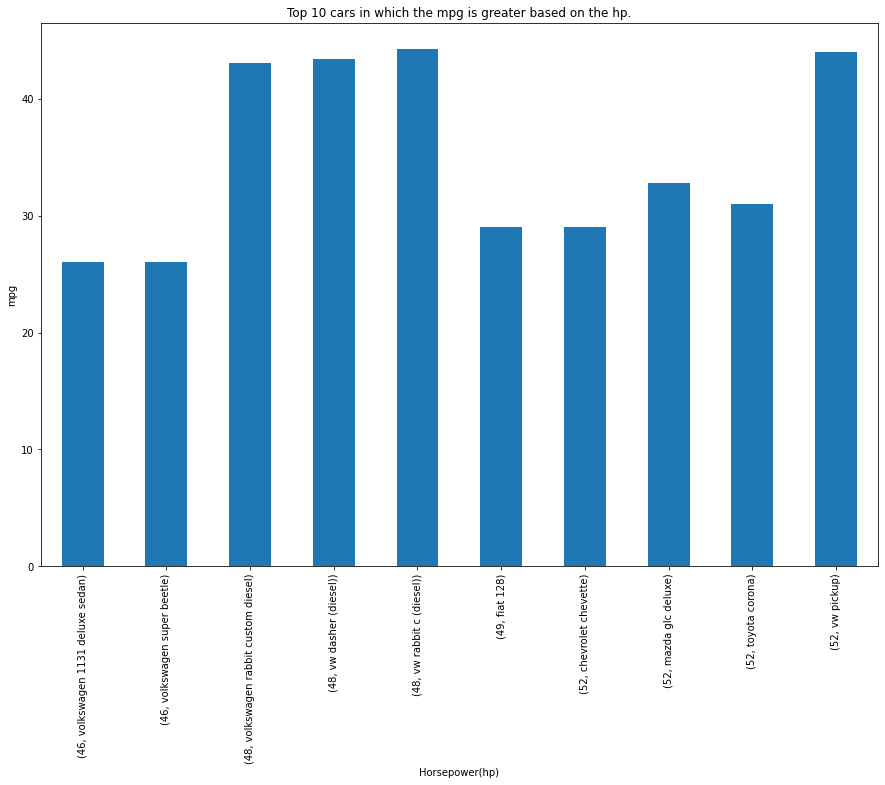

In [26]:
plt.figure(num=None,figsize=(15,10))
plt.title('Top 10 cars in which the mpg is greater based on the hp.')
top_10.plot(kind='bar',xlabel='Horsepower(hp)',ylabel='mpg')
plt.show

## 2.Correlation of values showing through heatmap.

### Correlation

In [19]:
cmat=df1.corr()           #correlation of evry cols
cmat

mpg       cyl      disp        hp        wt       acc        yr
mpg   1.000000 -0.775396 -0.804203 -0.771543 -0.831741  0.420289  0.579267
cyl  -0.775396  1.000000  0.950721  0.839061  0.896017 -0.505419 -0.348746
disp -0.804203  0.950721  1.000000  0.893760  0.932824 -0.543684 -0.370164
hp   -0.771543  0.839061  0.893760  1.000000  0.860676 -0.684376 -0.411750
wt   -0.831741  0.896017  0.932824  0.860676  1.000000 -0.417457 -0.306564
acc   0.420289 -0.505419 -0.543684 -0.684376 -0.417457  1.000000  0.288137
yr    0.579267 -0.348746 -0.370164 -0.411750 -0.306564  0.288137  1.000000

### Heatmap

<AxesSubplot:>

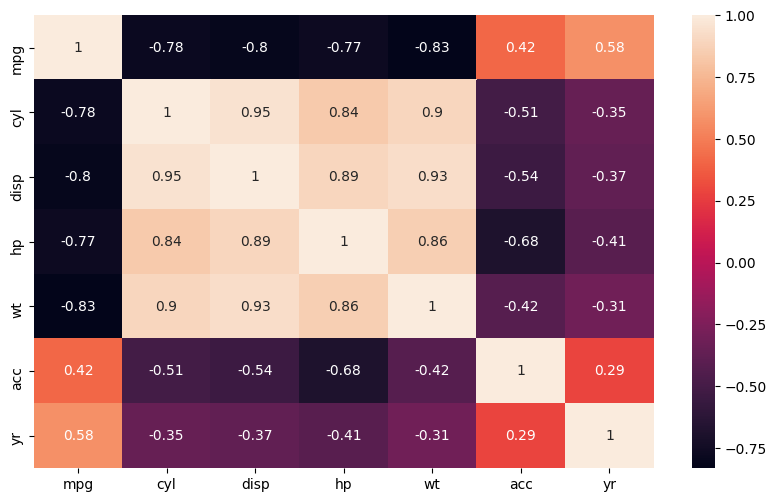

In [20]:
plt.figure(figsize=(10,6),dpi=100)
sns.heatmap(cmat,annot=True)

## 3.Country which manufactures highest amount of cars through pie chart.

### Grouping the country names

In [21]:
country_cnt=df1.origin_country.value_counts()                #count the origin_country
country_cnt

US        249
Europe     79
Japan      70
Name: origin_country, dtype: int64

### Pie_chart

In [22]:
country_cnt.plot(kind='pie',autopct='%.2f',radius=1.2,explode=[0.06,0.06,0.06])

<AxesSubplot:ylabel='origin_country'>

## 4.Comparing the mpg based on the origin with the average mpg through boxplot.

### Boxplot

Text(0.5, 1.0, 'Europe and Japan mpg is higher than avg while Us mpg is below than avg.')

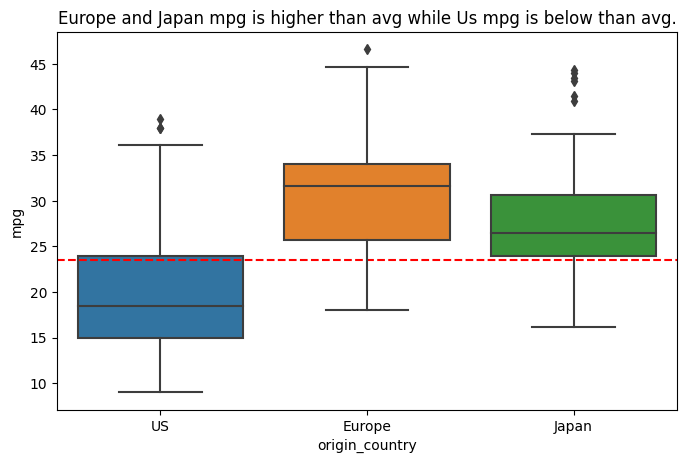

In [23]:
plt.figure(figsize=(8,5),dpi=100)
plt.axhline(y=df1.mpg.mean(),color='red',linestyle='dashed')                    #to show the line at mean mpg for analysing
bx=sns.boxplot(x='origin_country',y='mpg',data=df1)
bx.set_title("Europe and Japan mpg is higher than avg while Us mpg is below than avg.")

The red line marks the  average of the set. From the above plot we can observe:

 - Majority of the cars from USA (almost 75%) have MPG below global average of the given dataset.
 - Majority of the cars from Japan and Europe have MPG above global average of the given dataset.

## 5.Showing the car details using horsepower(hp) and origin_country column through 3d scatter plot.

In [24]:
fig = px.scatter_3d(df1, x='car_name', y='cyl', z='mpg',color='hp', size='acc', 
                    opacity=0.8,symbol='origin_country',title="Car details")
fig.update_layout(legend=dict(yanchor="top",y=0.99,xanchor="left",x=0.01))
fig.show()